In [5]:
import autorootcwd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from src.data import artificial, spam
from src.evaluation import evaluate, search_knn, search_rf, search_xgboost

In [6]:
X_a, y_a = artificial.prepare_data()
X_spam, y_spam = spam.prepare_data()

In [7]:
c_s = [i for i in range(4, 51, 4)]

scores_knn = []
scores_rf = []
scoeres_xgb = []
features = []
params_knn_a = []
params_rf_a = []
params_xgb_a = []
features = []
n_features = []

In [8]:
for c in c_s:
    print(f"_____ C={c} _____")
    rf_clf = RandomForestClassifier(random_state=111)
    rf_clf.fit(X_a, y_a)

    sfm = SelectFromModel(rf_clf, max_features=c, prefit=True)
    X_selected = sfm.transform(X_a)
    selected_feature_indices = sfm.get_support(indices=True)
    num_features = X_selected.shape[1]
    print(f"{num_features} features selected")

    params_knn, score_knn = search_knn(X_selected, y_a, num_folds=10)
    params_rf, score_rf = search_rf(X_selected, y_a, num_folds=10)
    params_xgb, score_xgb = search_xgboost(X_selected, y_a, num_folds=10)

    scores = evaluate(X_selected, y_a, params_knn=params_knn, params_rf=params_rf, params_xgb=params_xgb, num_folds=10, scoring_coefficient=0.2)

    scores_knn.append(scores['KNN'][1])
    scores_rf.append(scores['RF'][1])
    scoeres_xgb.append(scores['XGB'][1])
    params_knn_a.append(params_knn)
    params_rf_a.append(params_rf)
    params_xgb_a.append(params_xgb)
    n_features.append(num_features)
    features.append(selected_feature_indices)

    print(f"KNN {scores['KNN'][1]} | RF {scores['RF'][1]} | XGB {scores['XGB'][1]}")

_____ C=4 _____
4 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.7295 | RF 0.715 | XGB 0.7130000000000001
_____ C=8 _____
8 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8525 | RF 0.828 | XGB 0.835
_____ C=12 _____
12 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8715 | RF 0.859 | XGB 0.8354999999999999
_____ C=16 _____
16 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, to

In [9]:
df = pd.DataFrame(data=np.array([n_features, scores_knn, scores_rf, scoeres_xgb]).transpose(), columns=["features", "knn", "rf", "xgb"])

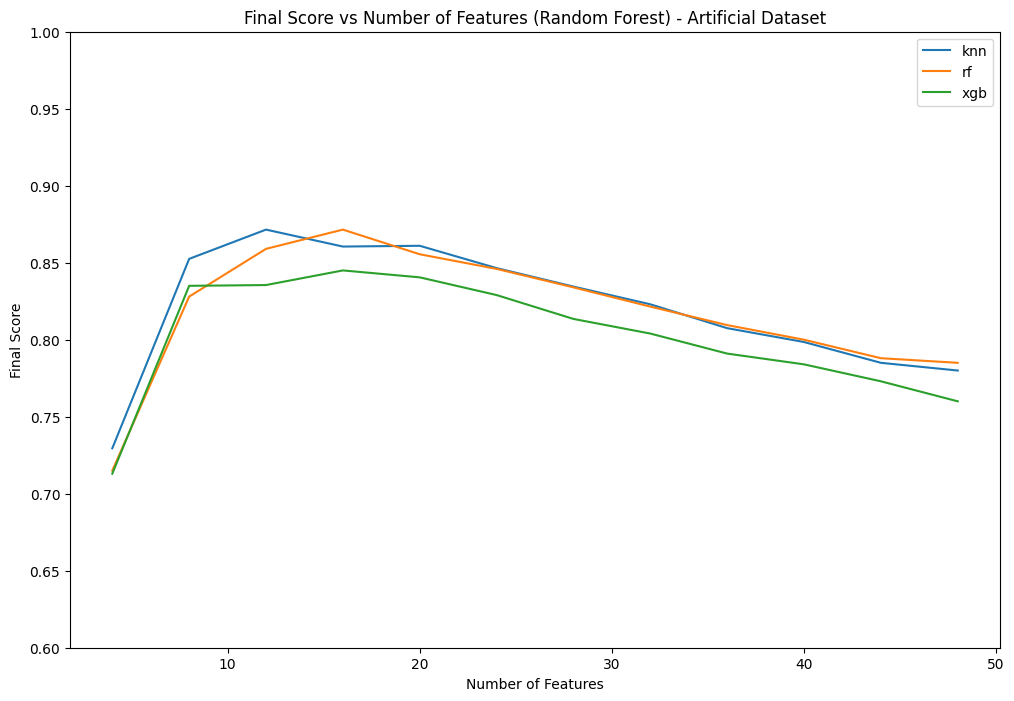

In [10]:
plt.figure(figsize=(12, 8))
plt.title("Final Score vs Number of Features (Random Forest) - Artificial Dataset")
plt.xlabel("Number of Features")
plt.ylabel("Final Score")
plt.ylim((0.6, 1.0))

sns.lineplot(data=pd.melt(df, ['features']), x="features", y="value", hue='variable')

plt.legend()
plt.savefig("artificial_rf.png")
plt.show()

In [11]:
scores_knn_spam = []
scores_rf_spam = []
scoeres_xgb_spam = []
params_knn_spam = []
params_rf_spam = []
params_xgb_spam = []
features_spam = []
n_features_spam = []

c_s = [i for i in range(5, 101, 5)]

In [12]:
for c in c_s:
    print(f"_____ C={c} _____")
    rf_clf = RandomForestClassifier(random_state=111)
    rf_clf.fit(X_spam, y_spam)

    sfm = SelectFromModel(rf_clf, max_features=c, prefit=True)
    X_selected = sfm.transform(X_spam)
    selected_feature_indices = sfm.get_support(indices=True)
    num_features = X_selected.shape[1]
    print(f"{num_features} features selected")

    params_knn, score_knn = search_knn(X_selected, y_spam, num_folds=10)
    params_rf, score_rf = search_rf(X_selected, y_spam, num_folds=10)
    params_xgb, score_xgb = search_xgboost(X_selected, y_spam, num_folds=10)

    scores = evaluate(X_selected, y_spam, params_knn=params_knn, params_rf=params_rf, params_xgb=params_xgb, num_folds=10, scoring_coefficient=0.01)

    scores_knn_spam.append(scores['KNN'][1])
    scores_rf_spam.append(scores['RF'][1])
    scoeres_xgb_spam.append(scores['XGB'][1])
    params_knn_spam.append(params_knn)
    params_rf_spam.append(params_rf)
    params_xgb_spam.append(params_xgb)
    n_features_spam.append(num_features)
    features_spam.append(selected_feature_indices)

    print(f"KNN {scores['KNN'][1]} | RF {scores['RF'][1]} | XGB {scores['XGB'][1]}")

_____ C=5 _____
5 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8354743133157005 | RF 0.7599975238870303 | XGB 0.7525470941534171
_____ C=10 _____
10 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8536725743670633 | RF 0.8575335140560091 | XGB 0.8479254690368059
_____ C=15 _____
15 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
KNN 0.8592091047499812 | RF 0.8685426428906269 | XGB 0.8601598185700663
_____ C=20 _____
20 features selected
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Fitting 10 folds

In [13]:
df = pd.DataFrame(data=np.array([n_features_spam, scores_knn_spam, scores_rf_spam, scoeres_xgb_spam]).transpose(), columns=["features", "knn", "rf", "xgb"])

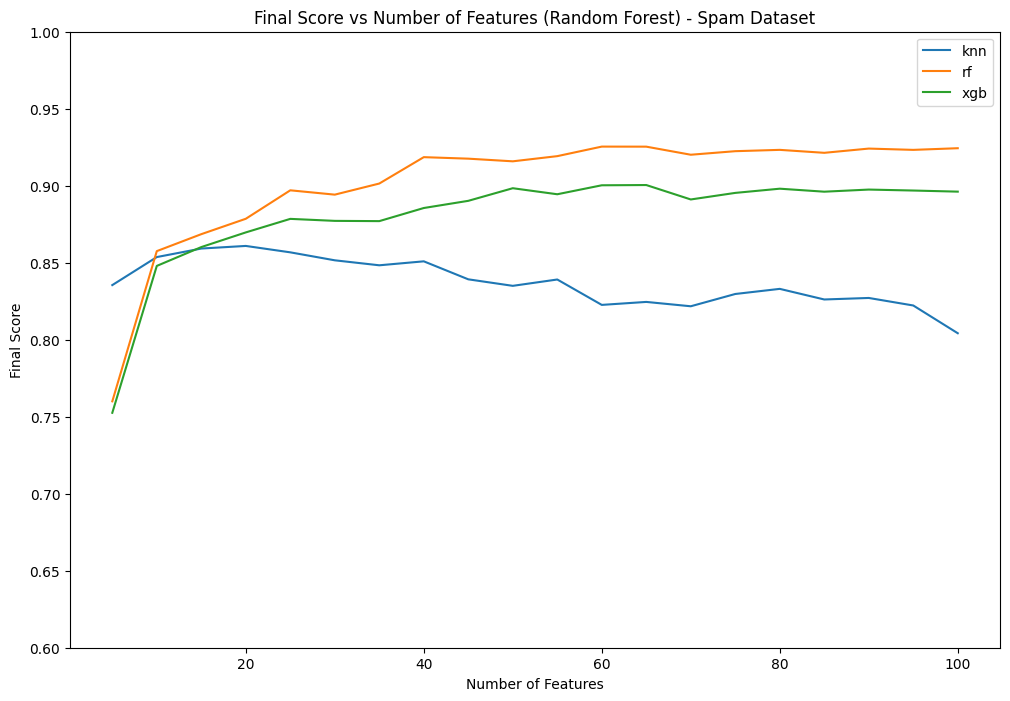

In [14]:
plt.figure(figsize=(12, 8))
plt.title("Final Score vs Number of Features (Random Forest) - Spam Dataset")
plt.xlabel("Number of Features")
plt.ylabel("Final Score")
plt.ylim((0.6, 1.0))

sns.lineplot(data=pd.melt(df, ['features']), x="features", y="value", hue='variable')

plt.legend()
plt.savefig("spam_rf.png")
plt.show()

### Artificial analysis

In [22]:
print(np.array(scores_knn).max())
print(np.array(scores_knn).argmax())

0.8715
2


In [23]:
print(scores_knn[2])
print(params_knn_a[2])

0.8715
{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [24]:
print(features[2])

[ 48  64 105 128 153 241 336 338 378 442 472 475]


In [25]:
print(n_features[2])

12


### Spam analysis

In [27]:
print(np.array(scores_rf_spam).max())
print(np.array(scores_rf_spam).argmax())

0.925401271482201
11


In [28]:

print(scores_rf_spam[11])
print(params_rf_spam[11])

0.925401271482201
{'n_estimators': 100}


In [29]:
print(features_spam[11])

[ 255  256  266  302  314  318  533  534  616 1181 1632 1700 1769 1851
 1898 1909 1932 2015 2129 2168 3005 3047 3082 3332 3431 3605 4088 4114
 4215 4589 4635 4706 4857 4904 4945 5076 5110 5249 5535 5696 5748 5845
 5919 6171 6641 6943 7093 7119 7120 7256 7284 7357 7360 7444 7612 7691
 7747 7811 7872 7877]


In [31]:
print(n_features_spam[11])

60


### Results

In [32]:
data_ = [
    {"dataset_name": "artificial", "feature_selection_method": "rf", "classifier":"KNN", "best_num_features": 12, "best_score": 0.8715},
    {"dataset_name": "spam", "feature_selection_method": "rf", "classifier":"RF", "best_num_features": 60, "best_score": 0.925401271482201}
]

df_ = pd.DataFrame(data_, columns=["dataset_name", "feature_selection_method", "classifier", "best_num_features", "best_score"])
df_.to_csv("results/rf_results.csv", index=False)